<a href="https://colab.research.google.com/github/AgnieszkaBorys/data-science-bootcamp/blob/master/ML2206_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import fetch_openml 

Zbiory mnist to oetykietowane zbiory pewnych danych np obrazow (znaków drogowych i inne)

In [2]:
#zbiory mnist to oetykietowane zbiory pewnych obrazow np. znaków drogowych
mnist = fetch_openml('mnist_784')

In [3]:
mnist.keys()  #data - dane , target - wyniki, etykieta dla danych

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [4]:
print(mnist.DESCR)  

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [5]:
mnist.data.shape

(70000, 784)

In [6]:
#ustawia moment lamania wiersza w collabie
np.set_printoptions(linewidth=160)

In [7]:
mnist.data[20].reshape(28, 28).astype('int')   # bitmapa 28 na 28 pikseli, te numery odpowiadają kolorom w skali szarośći 0 -bialy, 255 - czarny

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38, 190,  25,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  13,  25,  10,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 112, 252, 125,   4,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 132, 252, 113,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  61, 252, 252

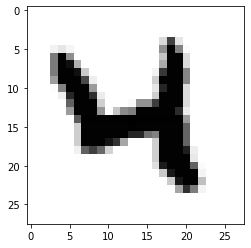

In [8]:
plt.imshow(mnist.data[20].reshape(28, 28), cmap='gray_r')

In [9]:
# podglądamy jak te dane zostały zaklasyfikowane
mnist.target[20]

'4'

In [10]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=0)

In [11]:
X_train.shape, X_test.shape

((56000, 784), (14000, 784))

In [12]:
model = KNeighborsClassifier(5, metric='euclidean')
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [13]:
#model.score(X_test, y_test)
#tego nie uruchamiamy bo bardzo długo będzie trwało

Ograniczymy nasz zestaw danych testowych, aby nie czekać długo na wynik. Metoda KNN nie sprawdza się gdy danych jest bardzo dużo.

In [14]:
np.random.seed(0)
rand_index = np.unique(np.random.randint(0, len(y_test), size = 1200))

In [15]:
y_pred = model.predict(X_test[rand_index])
accuracy_score(y_test[rand_index], y_pred)

0.9619706136560069

In [16]:
pd.DataFrame(confusion_matrix(y_test[rand_index], y_pred))

,0,1,2,3,4,5,6,7,8,9
0,125,0,0,0,0,0,0,0,0,0
1,0,125,0,1,0,0,0,0,0,0
2,4,2,125,1,1,0,0,2,0,0
3,0,0,4,110,0,0,0,0,2,0
4,0,1,0,0,108,0,1,0,0,3
5,0,0,0,2,0,96,2,0,0,0
6,1,0,0,0,0,1,106,0,0,0
7,0,1,1,0,0,0,0,116,0,1
8,1,2,1,1,0,3,1,1,85,1
9,0,0,0,0,0,0,0,2,0,117
